<h1 align="center">Excercise NO 2</h1>

<h1 align="center">Emergency Vehicle Justification</h1>

# Important Libraries

In [96]:
import  pandas as pd
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [98]:
train_data=pd.read_csv('train.csv')

In [100]:
train_data

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0
...,...,...
1641,1638.jpg,0
1642,1095.jpg,0
1643,1130.jpg,0
1644,1294.jpg,0


In [102]:
test_data=pd.read_csv('test.csv')

In [104]:
test_data

,image_names
0,1960.jpg
1,668.jpg
2,2082.jpg
3,808.jpg
4,1907.jpg
...,...
701,674.jpg
702,1027.jpg
703,447.jpg
704,2176.jpg


In [106]:
sample_submission=pd.read_csv('sample_submission.csv')

In [108]:
sample_submission

,image_names,emergency_or_not
0,1960.jpg,0
1,668.jpg,0
2,2082.jpg,0
3,808.jpg,0
4,1907.jpg,0
...,...,...
701,674.jpg,0
702,1027.jpg,0
703,447.jpg,0
704,2176.jpg,0


In [110]:
import pandas as pd

# Load CSVs
train_csv = pd.read_csv("train.csv")
test_csv = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

print("Train DataFrame:")
print(train_csv.head())

print("\nTest DataFrame:")
print(test_csv.head())

print("\nSample Submission Format:")
print(sample_submission.head())


Train DataFrame:
  image_names  emergency_or_not
0    1503.jpg                 0
1    1420.jpg                 0
2    1764.jpg                 0
3    1356.jpg                 0
4    1117.jpg                 0

Test DataFrame:
  image_names
0    1960.jpg
1     668.jpg
2    2082.jpg
3     808.jpg
4    1907.jpg

Sample Submission Format:
  image_names  emergency_or_not
0    1960.jpg                 0
1     668.jpg                 0
2    2082.jpg                 0
3     808.jpg                 0
4    1907.jpg                 0


In [112]:
# Paths
train_folder = "train/"
test_folder = "test/"
train_csv_path = "train.csv"
test_csv_path = "test.csv"
sample_submission_path = "sample_submission.csv"

# Load CSV
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

# Image size
IMG_SIZE = (128, 128)  # Resized to reduce computational load

# Function to preprocess images
def preprocess_images(image_names, folder):
    images = []
    for img_name in image_names:
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, IMG_SIZE)
            images.append(img)
        else:
            print(f"Image {img_name} not found in {folder}")
    return np.array(images) / 255.0  # Normalize to [0, 1]

# Preprocess training data
X = preprocess_images(train_df['image_names'], train_folder)
y = train_df['emergency_or_not'].values
y = to_categorical(y, num_classes=2)  # One-hot encoding for binary classification

# Preprocess test data
X_test = preprocess_images(test_df['image_names'], test_folder)


In [113]:
# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Training

In [115]:
# Initialize CNN
model = Sequential()

# Add Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Prevent overfitting
model.add(Dense(2, activation='softmax'))  # Output layer for 2 classes

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


C:\Users\FAST LAPTOP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [116]:
# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping]
)


Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 34s 634ms/step - accuracy: 0.4913 - loss: 0.9768 - val_accuracy: 0.6000 - val_loss: 0.6736
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 477ms/step - accuracy: 0.5966 - loss: 0.6699 - val_accuracy: 0.7091 - val_loss: 0.5818
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 22s 520ms/step - accuracy: 0.7119 - loss: 0.5861 - val_accuracy: 0.7000 - val_loss: 0.5692
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 23s 553ms/step - accuracy: 0.7584 - loss: 0.5354 - val_accuracy: 0.7576 - val_loss: 0.4991
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 23s 549ms/step - accuracy: 0.7933 - loss: 0.4792 - val_accuracy: 0.7758 - val_loss: 0.4922
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 22s 512ms/step - accuracy: 0.7805 - loss: 0.4580 - val_accuracy: 0.7303 - val_loss: 0.5256
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 42s 531ms/step - accuracy: 0.8169 - loss: 0.4124 - val_accuracy: 0.7909 - val_loss: 0.4623
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 36s 418ms/step - accuracy: 0.8271 - loss: 0.4081 - val_accu

In [117]:
# Evaluate on validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.8448 - loss: 0.3752
Validation Loss: 0.41171908378601074, Validation Accuracy: 0.8303030133247375


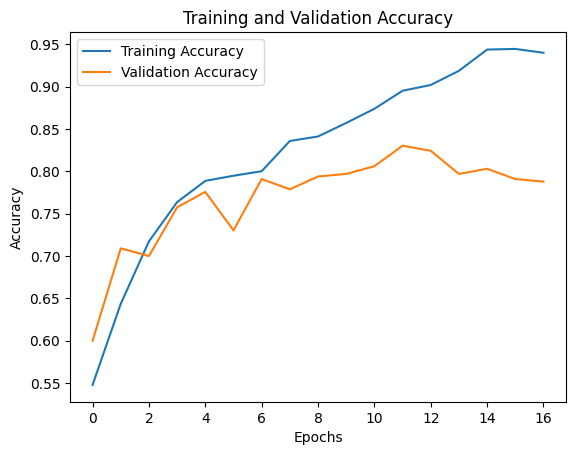

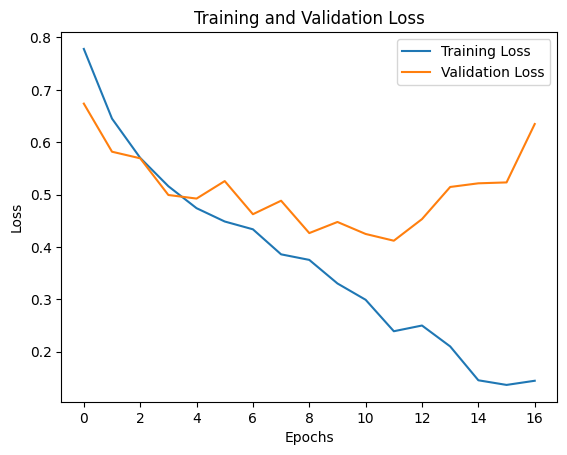

In [130]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Model Testing

In [ ]:
# Define the test folder path using a raw string
test_folder = r'C:\Users\FAST LAPTOP\Downloads\archive (1)\Emergency_Vehicles\test'  # Replace with your actual test folder path
IMG_SIZE = (128, 128)  # Size that your model expects

# Function to preprocess a single image
def preprocess_single_image(image_path):
    # Check if image exists at the specified path
    if not os.path.exists(image_path):
        print(f"Error: Image not found at {image_path}")
        return None
    
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Failed to load image at {image_path}")
        return None
    
    # Resize the image to the required input size for the model (128x128)
    img = cv2.resize(img, IMG_SIZE)
    img = np.array(img) / 255.0  # Normalize the image to [0, 1]
    
    return np.expand_dims(img, axis=0)  # Add batch dimension

# Select an image from the test folder (you can specify the image name or select randomly)
image_name = "1050.jpg"  # Replace with any image name in the test folder
image_path = os.path.join(test_folder, image_name)

# Preprocess the selected image
processed_image = preprocess_single_image(image_path)

if processed_image is not None:
    # Predict the class of the image
    prediction = model.predict(processed_image)
    predicted_class = np.argmax(prediction, axis=1)[0]  # Convert the prediction to a class label

    # Map the predicted class to the respective label
    label_map = {0: "Non-Emergency Vehicle", 1: "Emergency Vehicle"}
    predicted_label = label_map[predicted_class]

    # Display the image and the predicted result
    img_to_show = cv2.imread(image_path)
    img_to_show = cv2.cvtColor(img_to_show, cv2.COLOR_BGR2RGB)  # Convert color from BGR to RGB for displaying
    plt.imshow(img_to_show)
    plt.title(f"Prediction: {predicted_label}\nImage: {image_name}")
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


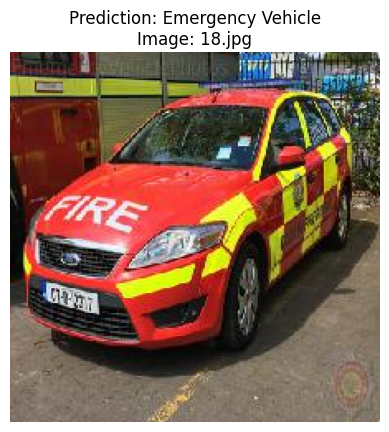

In [121]:
# Define the test folder path using a raw string
test_folder = r'C:\Users\FAST LAPTOP\Downloads\archive (1)\Emergency_Vehicles\test'  # Replace with your actual test folder path
IMG_SIZE = (128, 128)  # Size that your model expects

# Function to preprocess a single image
def preprocess_single_image(image_path):
    # Check if image exists at the specified path
    if not os.path.exists(image_path):
        print(f"Error: Image not found at {image_path}")
        return None
    
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Failed to load image at {image_path}")
        return None
    
    # Resize the image to the required input size for the model (128x128)
    img = cv2.resize(img, IMG_SIZE)
    img = np.array(img) / 255.0  # Normalize the image to [0, 1]
    
    return np.expand_dims(img, axis=0)  # Add batch dimension

# Select an image from the test folder (you can specify the image name or select randomly)
image_name = "18.jpg"  # Replace with any image name in the test folder
image_path = os.path.join(test_folder, image_name)

# Preprocess the selected image
processed_image = preprocess_single_image(image_path)

if processed_image is not None:
    # Predict the class of the image
    prediction = model.predict(processed_image)
    predicted_class = np.argmax(prediction, axis=1)[0]  # Convert the prediction to a class label

    # Map the predicted class to the respective label
    label_map = {0: "Non-Emergency Vehicle", 1: "Emergency Vehicle"}
    predicted_label = label_map[predicted_class]

    # Display the image and the predicted result
    img_to_show = cv2.imread(image_path)
    img_to_show = cv2.cvtColor(img_to_show, cv2.COLOR_BGR2RGB)  # Convert color from BGR to RGB for displaying
    plt.imshow(img_to_show)
    plt.title(f"Prediction: {predicted_label}\nImage: {image_name}")
    plt.axis('off')
    plt.show()
